<a href="https://colab.research.google.com/github/EmesBabasidi/Sample/blob/main/Restaurant_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Rating Prediction
## Importing Necessary Libraries for Preprocessing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
data = pd.read_csv('/content/Dataset .csv', index_col = 'Restaurant ID')

In [3]:
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,,,,,,,
6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9551 entries, 6317637 to 5927402
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range      

In [5]:
data.shape

(9551, 20)

### Checking for Null Values

In [6]:
data.isnull().sum()

,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9
Average Cost for two,0


Considering the missing values in cuisines are few, we can fill them with the mode (most frequent value)

In [7]:
most_frequent = data['Cuisines'].mode()[0]
data['Cuisines'] = data['Cuisines'].fillna(most_frequent)

In [8]:
data['Cuisines'].isnull().sum()

0

Now we don't have missing values in our dataset

## Exploratory Data Analysis

In [9]:
data.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<Axes: xlabel='Rating color', ylabel='count'>

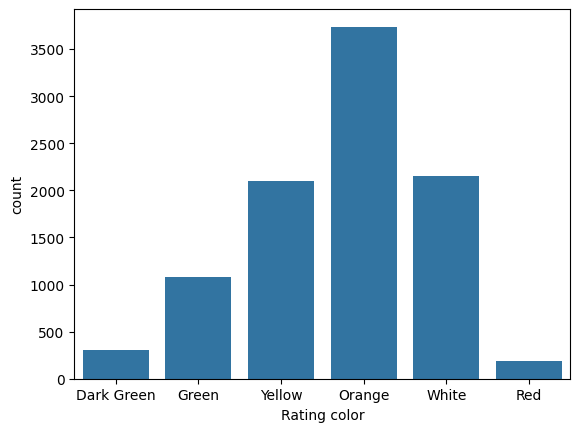

In [10]:
sns.countplot(x = 'Rating color', data=data)

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

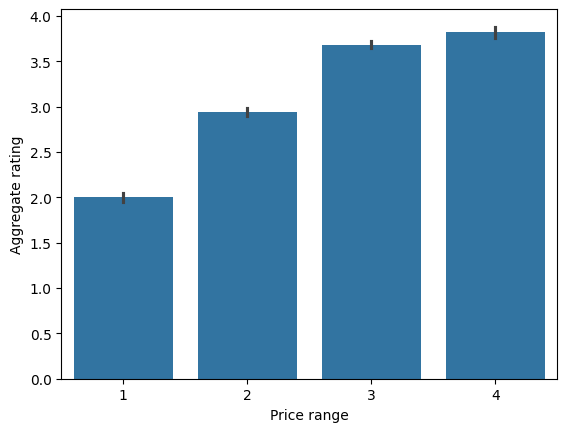

In [11]:
sns.barplot(x='Price range', y='Aggregate rating', data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Aggregate rating'>

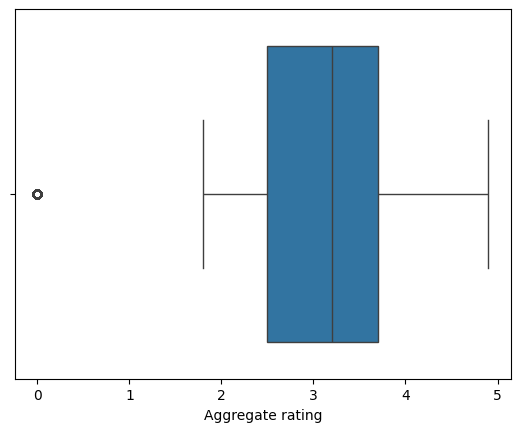

In [12]:
sns.boxplot(x='Aggregate rating', data=data)

<Axes: xlabel='Aggregate rating', ylabel='count'>

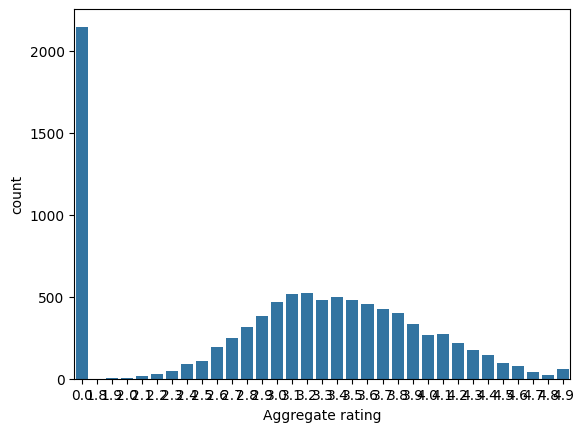

In [13]:
sns.countplot(x = 'Aggregate rating', data=data)

## Encoding Categorical Features

In [14]:
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for element in binary_columns:
    data[element] = data[element].map({'Yes': 1, 'No': 0})

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [16]:
nonbinary_columns = ['Cuisines', 'Currency', 'Locality', 'Rating color', 'Rating text']
for element in nonbinary_columns:
    data[element] = label_encoder.fit_transform(data[element])

## Feature selection
<br>The Name and ID of a Restaurant would not contribute to the model's learning and so can be dropped
<br>The Longitude and Latitude has provided enough geographic information, therefore we can drop Country code, city and address
<br>Including 'Locality Verbose' will cause redundacy as 'Locality' is suffucient.

In [17]:
columns_to_drop = ['Aggregate rating','Restaurant Name', 'Country Code', 'City', 'Address', 'Locality Verbose', 'Switch to order menu']
X = data.drop(columns_to_drop, axis=1)
y = data['Aggregate rating']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

## Scaling the Data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

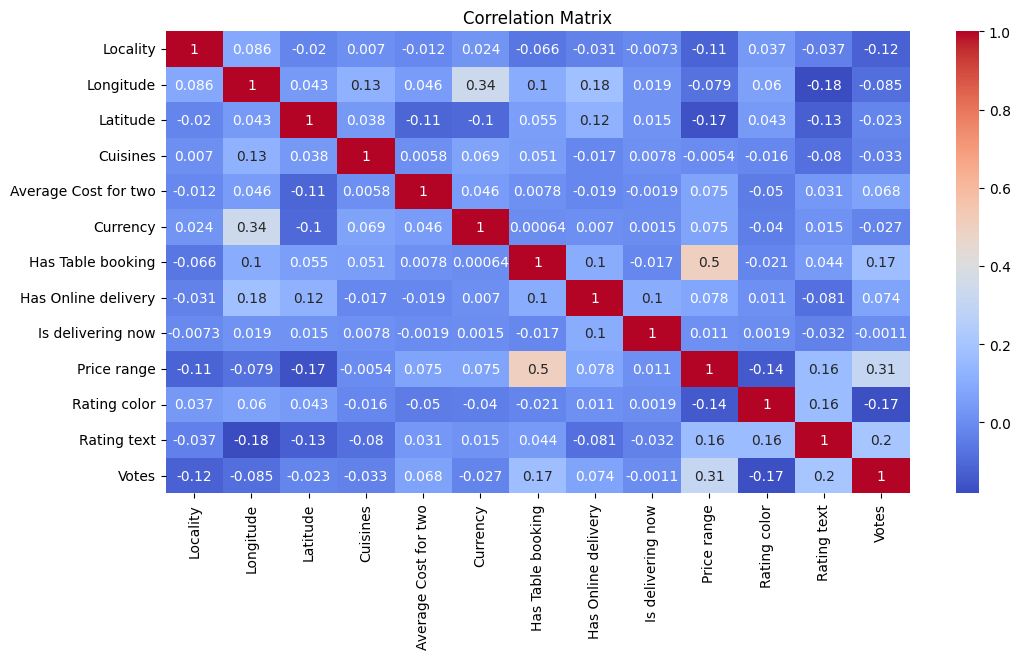

In [20]:
matrix = X.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
mean_squared_error(y_test, y_pred)

1.3694425343309737

In [25]:
root_mean_squared_error(y_test, y_pred)

1.1702318293103182

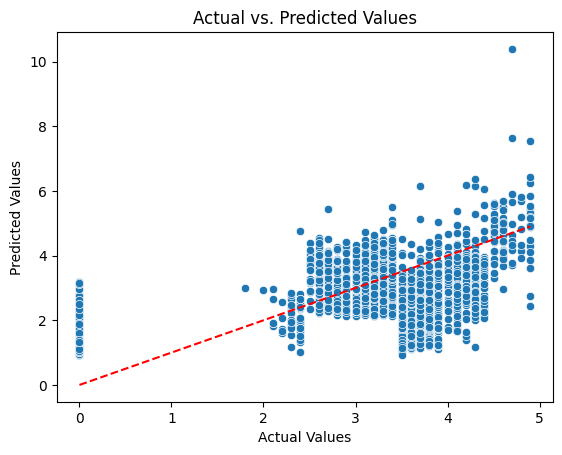

In [26]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

The Model's Prediction is almost perfect as it can be seen in the plot above

# Using Random Forest to build the model.

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model1 = RandomForestRegressor()
model1.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [29]:
y_pred = model1.predict(X_test_scaled)

In [30]:
mean_squared_error(y_test, y_pred)

0.028607318213538024

In [31]:
root_mean_squared_error(y_test, y_pred)

0.1691369806208507

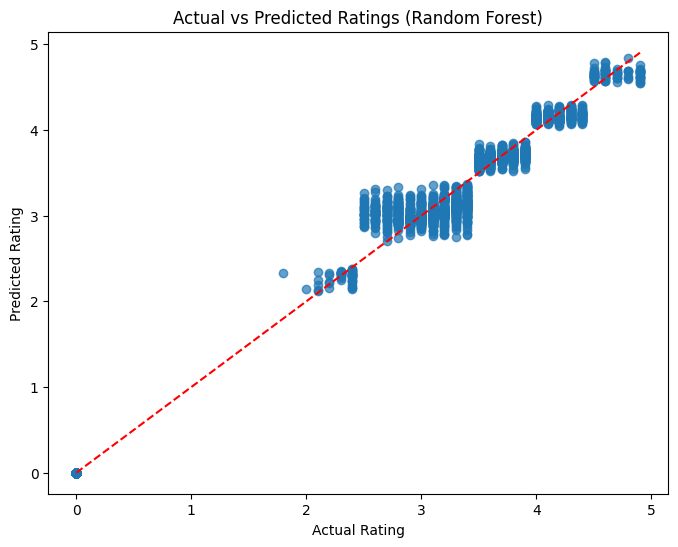

In [32]:
# Scatter plot of Predicted vs Actual for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()